In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from etl_airbnb import extract, transform  # type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = extract('../data/airbnb_listings.csv')
df_limpo = transform(df_raw)

df_limpo.head()


,titulo,descricao,avaliacao,preco_noite,nota_avaliacao,qtd_avaliacao
0,Apartamento em Copacabana,Apartamento charmoso e completo - 1 min da praia,"4,77 135 avaliações",1313.0,4.77,135
1,Apartamento em Copacabana,Praia e cidade com conforto,"4,84 50 avaliações",1233.0,4.84,50
2,Apartamento em Copacabana,"Localização excelente na praia de Copacabana, ...","4,81 173 avaliações",1135.0,4.81,173
3,Quarto em Copacabana,Quarto Suite Vista Mar em Copacabana.,"4,94 63 avaliações",765.0,4.94,63
4,Apartamento em Copacabana,Coração de Copacabana - R.Barata Ribeiro,"4,97 168 avaliações",1632.0,4.97,168


In [2]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          18 non-null     object 
 1   descricao       18 non-null     object 
 2   avaliacao       18 non-null     object 
 3   preco_noite     18 non-null     float64
 4   nota_avaliacao  18 non-null     float64
 5   qtd_avaliacao   18 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 996.0+ bytes


In [3]:
df_limpo['preco_noite'].describe()

count      18.000000
mean     1438.111111
std       325.487668
min       765.000000
25%      1252.750000
50%      1370.000000
75%      1626.000000
max      2243.000000
Name: preco_noite, dtype: float64

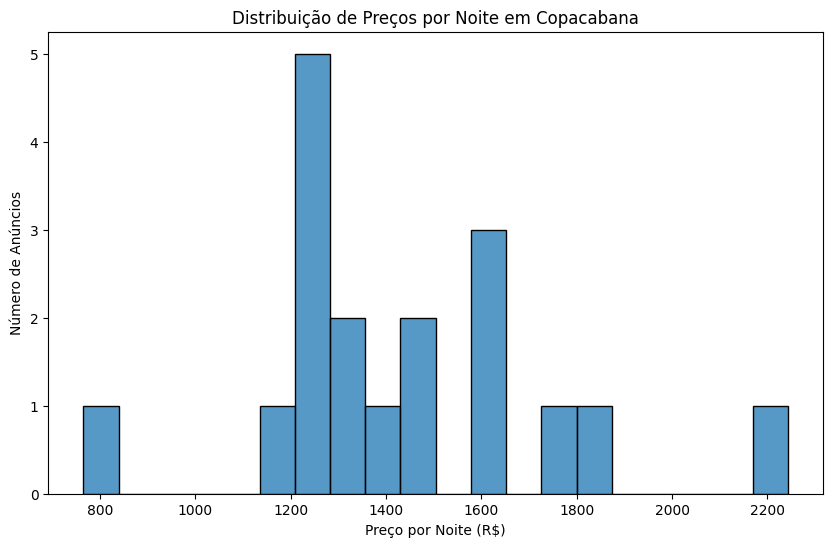

In [4]:
plt.figure(figsize=(10, 6))

sns.histplot(df_limpo['preco_noite'], bins=20)

plt.title('Distribuição de Preços por Noite em Copacabana')
plt.xlabel('Preço por Noite (R$)')
plt.ylabel('Número de Anúncios')
plt.savefig('../reports/images/distribuicao_precos.png')
plt.show()

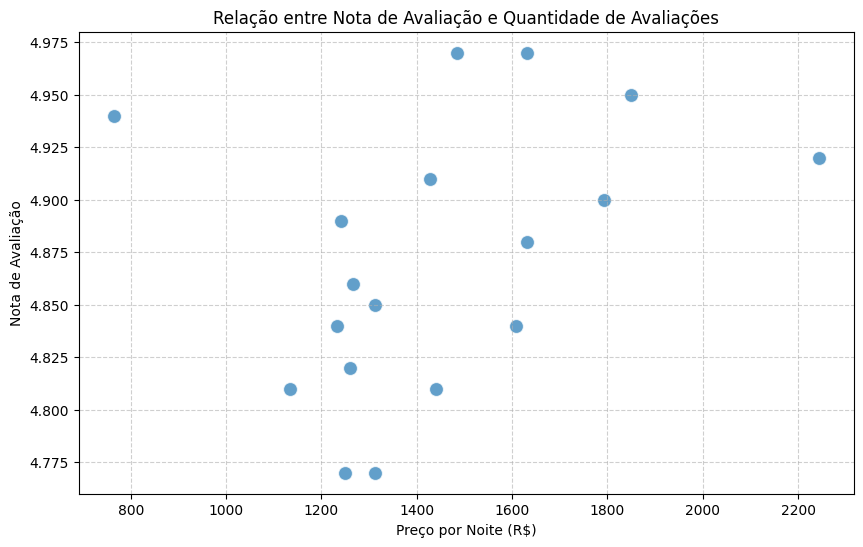

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='preco_noite', y='nota_avaliacao', data=df_limpo, s=100, alpha=0.7)
plt.title('Relação entre Nota de Avaliação e Quantidade de Avaliações')
plt.xlabel('Preço por Noite (R$)')
plt.ylabel('Nota de Avaliação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('../reports/images/corr_preco_avaliacao.png')

plt.show()

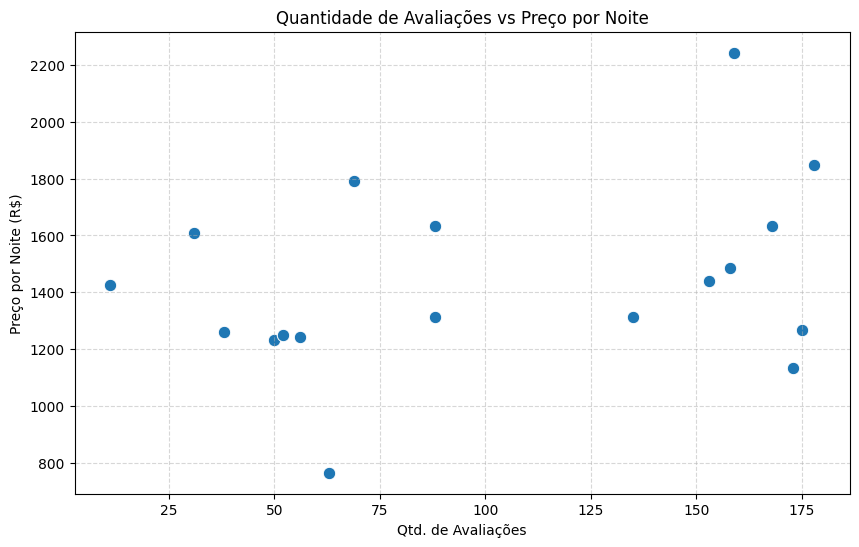

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qtd_avaliacao', y='preco_noite', data=df_limpo, s=80)
plt.title('Quantidade de Avaliações vs Preço por Noite')
plt.xlabel('Qtd. de Avaliações')
plt.ylabel('Preço por Noite (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('../reports/images/qtd_avaliacoes_vs_preco.png')
plt.show()


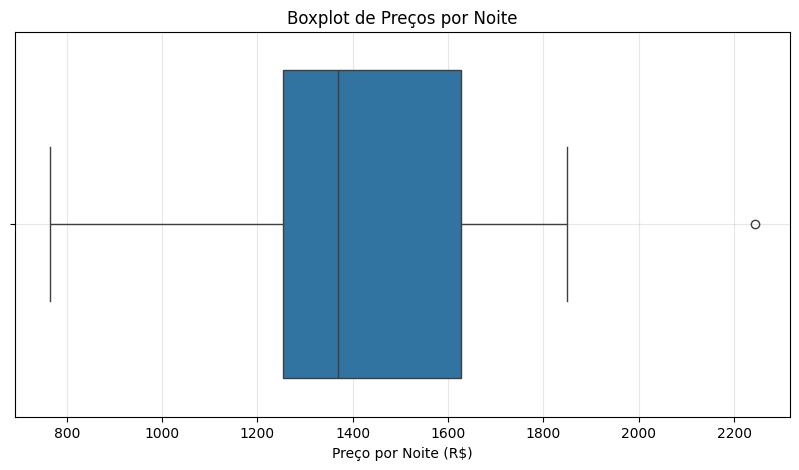

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpo['preco_noite'])
plt.title('Boxplot de Preços por Noite')
plt.xlabel('Preço por Noite (R$)')
plt.grid(True, alpha=0.3)
plt.savefig('../reports/images/boxplot_precos.png')
plt.show()


In [8]:
# Top 5 mais caros
df_top_caros = df_limpo.sort_values(by='preco_noite', ascending=False).head(5)
print("Top 5 Acomodações Mais Caras:")
display(df_top_caros[['titulo', 'preco_noite', 'nota_avaliacao']])

# Top 5 mais baratos
df_top_baratos = df_limpo.sort_values(by='preco_noite', ascending=True).head(5)
print("Top 5 Acomodações Mais Baratas:")
display(df_top_baratos[['titulo', 'preco_noite', 'nota_avaliacao']])


Top 5 Acomodações Mais Caras:


,titulo,preco_noite,nota_avaliacao
13,Apartamento em Copacabana,2243.0,4.92
15,Loft em Copacabana,1849.0,4.95
14,Apartamento em Copacabana,1792.0,4.90
4,Apartamento em Copacabana,1632.0,4.97
16,Apartamento em Copacabana,1632.0,4.88


Top 5 Acomodações Mais Baratas:


,titulo,preco_noite,nota_avaliacao
3,Quarto em Copacabana,765.0,4.94
2,Apartamento em Copacabana,1135.0,4.81
1,Apartamento em Copacabana,1233.0,4.84
9,Apartamento em Copacabana,1242.0,4.89
10,Apartamento em Copacabana,1250.0,4.77
